In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
from CenterOfMass import CenterOfMass

## Question 1

In [2]:
# define filepaths to galaxy snapshot files
# because I don't want to make new copies of all 3 files
MW_path = r'../Homework3/MW_000.txt'
M31_path = r'../Homework3/M31_000.txt'
M33_path = r'../Homework3/M33_000.txt'

# put them in a list to make Q1 easier
fpaths = [MW_path, M31_path, M33_path]

In [3]:
n = len(fpaths) # get the length of the file list to use later

COM_pos_arr = np.zeros((n,3))*u.kpc # will contain the position vectors
COM_vel_arr = np.zeros((n,3))*u.km/u.s # will contain the velocity vectors

# iterating through the files to get all of the COM information
for i in range(n): 

    #get the right filepath
    fpath = fpaths[i]
    # use only disk particles for determining COM
    ptype = 2.
    # initialize COM class
    COM = CenterOfMass(fpath, ptype) 

    # use tolerance of 0.1 kpc for finding COM position
    # which is already the default, so no input required :)
    # anyway find the COM position
    COM_pos = COM.COM_P()
    # and save it to the position array
    COM_pos_arr[i] = COM_pos

    # find the COM velocity
    COM_vel = COM.COM_V(COM_pos[0], COM_pos[1], COM_pos[2])
    # and save it to the velocity array
    COM_vel_arr[i] = COM_vel

In [4]:
# put everything into a dictionary
COM_dict = {'Galaxy':['Milky Way', 'M31', 'M33'],
            'x (kpc)': COM_pos_arr[:,0],
            'y (kpc)': COM_pos_arr[:,1],
            'z (kpc)': COM_pos_arr[:,2],
            'vx (km/s)': COM_vel_arr[:,0],
            'vy (km/s)': COM_vel_arr[:,1],
            'vz (km/s)': COM_vel_arr[:,2]}

# and then a dataframe to make it easier to parse visually
COM_df = pd.DataFrame(COM_dict)
COM_df

,Galaxy,x (kpc),y (kpc),z (kpc),vx (km/s),vy (km/s),vz (km/s)
0,Milky Way,-2.07,2.95,-1.45,0.94,6.32,-1.35
1,M31,-377.66,611.43,-284.64,72.85,-72.14,49.00
2,M33,-476.22,491.44,-412.40,44.42,101.78,142.23


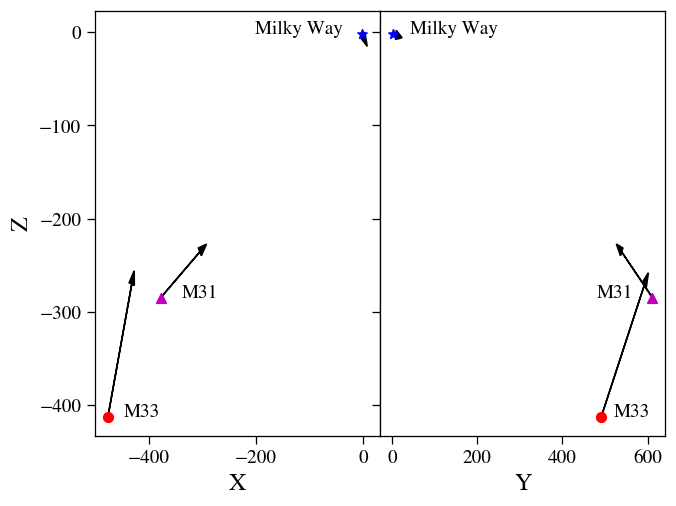

In [5]:
# I decided to plot it so I could see what was happening 
# in 2D, granted. One plot for the x-z plane and one for the y-z plane

# I prefer a serif font on my plots ¯\_(ツ)_/¯
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['figure.dpi'] = 115 # increase the resolution slightly

fig, ax = plt.subplots(1,2, sharey=True) # make a fig and axes to plot on

# Milky Way

# x-z plane
ax[0].arrow(COM_df['x (kpc)'][0], COM_df['z (kpc)'][0],
         COM_df['vx (km/s)'][0],  COM_df['vz (km/s)'][0],
         head_width=10, color='k') # velocity
ax[0].scatter(COM_df['x (kpc)'][0], COM_df['z (kpc)'][0], 
           c='b', marker='*') # position
ax[0].annotate('Milky Way', (COM_df['x (kpc)'][0]-200, 
                          COM_df['z (kpc)'][0]),
            size=12) # label it with text to make the plot look less empty lol

# y-z plane
ax[1].arrow(COM_df['y (kpc)'][0], COM_df['z (kpc)'][0],
         COM_df['vy (km/s)'][0],  COM_df['vz (km/s)'][0],
         head_width=10, color='k') # velocity
ax[1].scatter(COM_df['y (kpc)'][0], COM_df['z (kpc)'][0], 
           c='b', marker='*') # position
ax[1].annotate('Milky Way', (COM_df['y (kpc)'][0]+40, 
                          COM_df['z (kpc)'][0]),
            size=12) # label it with text 

# repeat for the other two galaxies

# M31

# x-z plane
ax[0].arrow(COM_df['x (kpc)'][1], COM_df['z (kpc)'][1],
         COM_df['vx (km/s)'][1],  COM_df['vz (km/s)'][1],
         head_width=10, color='k')
ax[0].scatter(COM_df['x (kpc)'][1], COM_df['z (kpc)'][1], 
           c='m', marker='^')
ax[0].annotate('M31', (COM_df['x (kpc)'][1]+40, 
                    COM_df['z (kpc)'][1]),
            size=12)

# y-z plane
ax[1].arrow(COM_df['y (kpc)'][1], COM_df['z (kpc)'][1],
         COM_df['vy (km/s)'][1],  COM_df['vz (km/s)'][1],
         head_width=10, color='k')
ax[1].scatter(COM_df['y (kpc)'][1], COM_df['z (kpc)'][1], 
           c='m', marker='^')
ax[1].annotate('M31', (COM_df['y (kpc)'][1]-130, 
                    COM_df['z (kpc)'][1]),
            size=12)

# M33

# x-z plane
ax[0].arrow(COM_df['x (kpc)'][2], COM_df['z (kpc)'][2],
         COM_df['vx (km/s)'][2],  COM_df['vz (km/s)'][2],
         head_width=10, color='k')
ax[0].scatter(COM_df['x (kpc)'][2], COM_df['z (kpc)'][2], 
           c='r', marker='o')
ax[0].annotate('M33', (COM_df['x (kpc)'][2]+30, 
                    COM_df['z (kpc)'][2]),
            size=12)

# y-z plane
ax[1].arrow(COM_df['y (kpc)'][2], COM_df['z (kpc)'][2],
         COM_df['vy (km/s)'][2],  COM_df['vz (km/s)'][2],
         head_width=10, color='k')
ax[1].scatter(COM_df['y (kpc)'][2], COM_df['z (kpc)'][2], 
           c='r', marker='o')
ax[1].annotate('M33', (COM_df['y (kpc)'][2]+30, 
                    COM_df['z (kpc)'][2]),
            size=12)

# making the plot look nicer

# x-z plane
ax[0].tick_params(labelsize=12, length=5)
ax[0].set_xlabel('X', size=15)
ax[0].set_ylabel('Z', size=15)

# y-z plane
ax[1].tick_params(labelsize=12, length=5)
ax[1].set_xlabel('Y', size=15)

# put the two plots next to each other 
fig.subplots_adjust(wspace=0)

## Question 2

In [ ]:
sep_vec = COM_pos_arr[0] - COM_pos_arr[1] # get the separation vector
separation = np.around(np.sqrt(np.sum(sep_vec**2)), 3) # compute its magnitude

dvel_vec = COM_vel_arr[0] - COM_vel_arr[1] # get the velocity difference vector
dvelocity = np.around(np.sqrt(np.sum(dvel_vec**2)), 3) # compute its magnitude

print(f'The Milky Way and M31 are {separation} apart and have a velocity difference of {dvelocity}.') 
# numbers make sense!

The Milky Way and M31 are 769.098 kpc apart and have a velocity difference of 117.738 km / s.


## Question 3

In [7]:
sep_vec = COM_pos_arr[1] - COM_pos_arr[2] # get the separation vector
separation = np.around(np.sqrt(np.sum(sep_vec**2)), 3) # compute its magnitude

dvel_vec = COM_vel_arr[1] - COM_vel_arr[2] # get the velocity difference vector
dvelocity = np.around(np.sqrt(np.sum(dvel_vec**2)), 3) # compute its magnitude

print(f'M31 and M33 are {separation} apart and have a velocity difference of {dvelocity}.')

M31 and M33 are 201.083 kpc apart and have a velocity difference of 199.37 km / s.


## Question 4

The iterative process for determining the COM is important because once the Milky Way and M31 begin interacting, for particles that are further out it becomes difficult to determine which galaxy they "belong" to; this iterative method allows us to focus in on the particles that are most gravitationally bound together and thus influence the COM the most.